# Compare experimental data to simulations to find squeezing parameter

25 November 2025

Santi

In [1]:
# import two_atom_interaction.py
from two_atom_interaction import *

# for running MATLAB scripts and getting experiment data
from mat2py import *

## finding the trap depth from unsqueezed data

### obtain data from experiment

In [3]:
# define variables to get
vars_to_get = ["fname", "surv2", "X1", "X2"]
# define path to MATLAB script
script_path = r'/Users/santi/Library/CloudStorage/GoogleDrive-santilopez@g.harvard.edu/My Drive/Research/Code/experiment-control/matlab_new/analysis/scripts/11_18_25'
# run MATLAB script and get variables
data = run_matlab_script_and_get_vars("compare3_RNR", vars_to_get, script_path=script_path)

# Now you have NumPy arrays in Python
fname = data["fname"] # add fname variable in MATLAB script (data.master_fname)
surv2 = data["surv2"][0]
X1 = data["X1"][0] # time array
X2 = data["X2"][0] # hold time array (changes squeezing parameter)


print('\n- Results from MATLAB script -')
print("fname (str):", type(fname), fname)
print("surv2 (NumPy):", type(surv2), surv2.shape, "\n", surv2)
print("X1 (NumPy):", type(X1), X1.shape, "\n", X1)
print('X2 (NumPy):', type(X2), X2.shape, '\n', X2)


X2 =

     0     1


X2name =

    'DoCoolCs'

Loading summary file 1 out of 1
Loading time elapsed 0.168444
Processing file 1 out of 1
Processing time elapsed 0.000785

- Results from MATLAB script -
fname (str): <class 'numpy.ndarray'> /Volumes/data/NaCsRydLab/Data/20251125/data_20251125_131528/data_20251125_131528.mat
surv2 (NumPy): <class 'numpy.ndarray'> (7,) 
 [0.94362745 0.90848214 0.84054054 0.5821256  0.4504717  0.37105263
 0.36538462]
X1 (NumPy): <class 'numpy.ndarray'> (7,) 
 [  0.          16.66666667  33.33333333  50.          66.66666667
  83.33333333 100.        ]
X2 (NumPy): <class 'numpy.ndarray'> (2,) 
 [0. 1.]


In [15]:
print(X1)
print(surv2)

[  0.          16.66666667  33.33333333  50.          66.66666667
  83.33333333 100.        ]
[0.94362745 0.90848214 0.84054054 0.5821256  0.4504717  0.37105263
 0.36538462]


In [31]:
X1 = [0., 16.67, 33.33, 50., 66.67, 83.33, 100.]
surv2 = [0.9436, 0.9085, 0.8405, 0.5821, 0.4505, 0.3711, 0.3654]

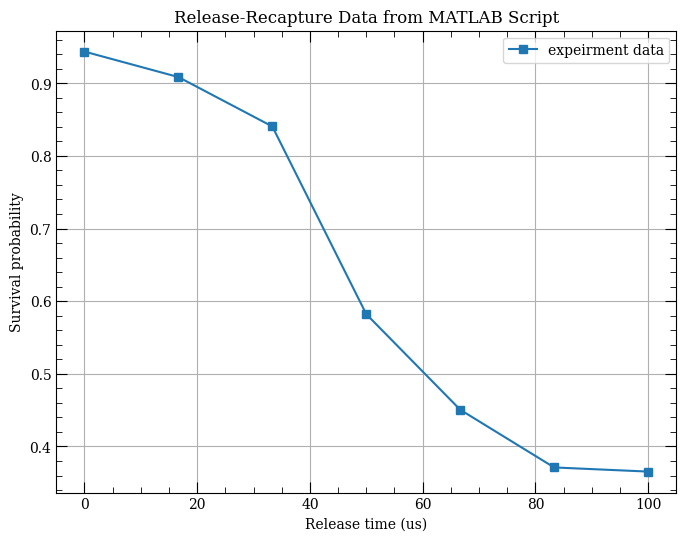

In [32]:
# print('Data path: ', fname)
# plot the release recapture data from above
plt.figure(figsize=(8,6))
# plt.plot(X1, surv1, 'o-', label=str(X2[0]) + ' us hold')
plt.plot(X1, surv2, 's-', label='expeirment data')
# plt.plot(X1, surv3, '^-', label=str(X2[2]) + ' us hold')
plt.xlabel('Release time (us)')
plt.ylabel('Survival probability')
plt.title('Release-Recapture Data from MATLAB Script')
plt.legend()
plt.grid()
plt.show()

### run RnR simulation and optimize on the trap depth temperature

In [ ]:
# set up simulation for Cs-Cs system with squeezing
pixel_to_um = 0.67 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
factor = 1.0
# Experiment configuration
cfg = ExperimentConfig(
    atom1 = Cesium(),
    mass_atom1 = Cesium().mass,
    n_atom1 = 54,  # Cs Rydberg n
    wavelength_nm_atom1 = 1064,  # Cs tweezer wavelength

    R_mean_um = 6 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 0,  # Cs Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive]

    Delta_scan_Hz = np.array([1e8]), # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (0.0, 0.0, 0.0),
    T_uK_atom2 = (2.0, 2.0, 2.0),

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (110e3, 110e3, 20e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (110e3, 110e3, 20e3),

    load_factor = np.sqrt(200/650),#np.sqrt(0.1),  # % of trap depth after dropping

    T2_atom1_s = 20e-6, # coherence time for Cs
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 1000,  # number of Monte Carlo samples per detuning
    N_steps = 100,  # number of time steps in evolution

    load_depth_T_atom1 = 100, # uK
    load_depth_T_atom2 = 100, # uK

    plot_displacements = False,  # whether to plot displacement histogram
    simulate_atom1_recapture=False,
    simulate_atom2_recapture=True,

    squeeze_factor = (factor, factor, 1.0), # squeezing in (x, y, z) directions

    hamiltonian_on = False
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -28.064532947562324 GHz·μm^6
C6 (Na 51S - Cs 54S) = 1.763e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 28.065 GHz·μm^6
time for C6 calculation: 0.2 s


In [34]:
# sweep over pulse times (Rabi frequencies)
pulse_times_us = np.linspace(1, 100, 7)  # in microseconds
colors = plt.cm.viridis(np.linspace(0, 1, len(pulse_times_us)))

# rabi_freqs_Hz = (np.pi / (2 * (pulse_times_us * 1e-6)))  # in Hz
pop_array = []
for pulse_time, color in zip(pulse_times_us, colors):
    cfg.t_pi_atom1_us = pulse_time

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")

    pop_array.append(P_int[0])  # only one detuning point

pop_array = np.array(pop_array)

Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction: 0.0 s


### combine plots for comparison

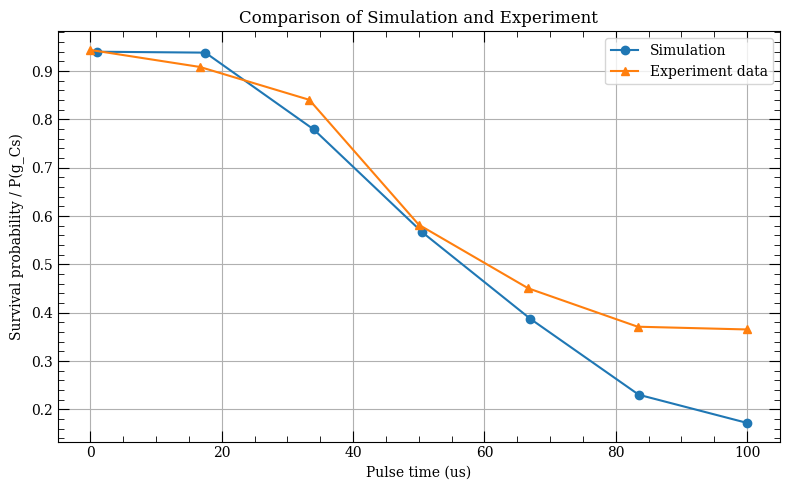

In [35]:
# combine plots for comparison (experiment and simulation)

plt.figure(figsize=(8,5))
plt.plot(pulse_times_us, pop_array*0.94, 'o-', label='Simulation')
plt.plot(X1, surv2, '^-', label='Experiment data')
plt.xlabel('Pulse time (us)')
plt.ylabel('Survival probability / P(g_Cs)')
plt.title('Comparison of Simulation and Experiment')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting det

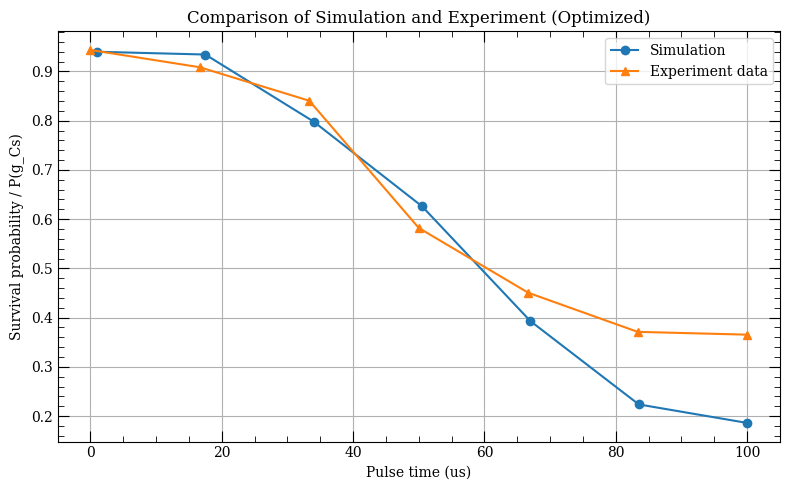

Optimal load_depth_T_atom2: 115.96 uK


In [37]:
# run RnR simulation and optimize cfg.load_depth_T_atom2 to match experiment

# import optimization library
from scipy.optimize import minimize_scalar

# define objective function to minimize
def objective(load_depth_T_atom2):
    cfg.load_depth_T_atom2 = load_depth_T_atom2
    pop_array = []
    for pulse_time in pulse_times_us:
        cfg.t_pi_atom1_us = pulse_time

        # run simulation here
        d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)

        pop_array.append(P_int[0])  # only one detuning point

    pop_array = np.array(pop_array)
    # compute error with experiment data
    error = np.sum((pop_array*0.94 - surv2)**2)
    return error

# perform optimization
result = minimize_scalar(objective, bounds=(0, 150), method='bounded')
optimal_load_depth_T_atom2 = result.x

# plot the final comparison with optimal parameter
cfg.load_depth_T_atom2 = optimal_load_depth_T_atom2
pop_array = []
for pulse_time in pulse_times_us:
    cfg.t_pi_atom1_us = pulse_time

    # run simulation here
    d, P_int = scan_detuning(cfg, c6_rad_um6=c6, interaction_on=True)

    pop_array.append(P_int[0])  # only one detuning point
pop_array = np.array(pop_array)
plt.figure(figsize=(8,5))
plt.plot(pulse_times_us, pop_array*0.94, 'o-', label='Simulation')
plt.plot(X1, surv2, '^-', label='Experiment data')
plt.xlabel('Pulse time (us)')
plt.ylabel('Survival probability / P(g_Cs)')
plt.title('Comparison of Simulation and Experiment (Optimized)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print(f'Optimal load_depth_T_atom2: {optimal_load_depth_T_atom2:.2f} uK')

## finding the squeezing parameter with the correct trap depth

### Obtain data from experiment

In [2]:
# define variables to get
vars_to_get = ["fname", "surv1", "surv2", "surv3", "X1", "X2"]
# define path to MATLAB script
script_path = r'/Users/santi/Library/CloudStorage/GoogleDrive-santilopez@g.harvard.edu/My Drive/Research/Code/experiment-control/matlab_new/analysis/scripts/11_18_25'
# run MATLAB script and get variables
data = run_matlab_script_and_get_vars("compare3_RNR", vars_to_get, script_path=script_path)

# Now you have NumPy arrays in Python
fname = data["fname"] # add fname variable in MATLAB script (data.master_fname)
surv1 = data["surv1"][0]
surv2 = data["surv2"][0]
surv3 = data["surv3"][0]
X1 = data["X1"][0] # time array
X2 = data["X2"][0] # hold time array (changes squeezing parameter)


print('\n- Results from MATLAB script -')
print("fname (str):", type(fname), fname)
print("surv1 (NumPy):", type(surv1), surv1.shape, "\n", surv1)
print("surv2 (NumPy):", type(surv2), surv2.shape, "\n", surv2)
print("surv3 (NumPy):", type(surv3), surv3.shape, "\n", surv3)
print("X1 (NumPy):", type(X1), X1.shape, "\n", X1)
print('X2 (NumPy):', type(X2), X2.shape, '\n', X2)


X2 =

   1.0e-05 *

    0.1500    0.3000    0.5000


X2name =

    'Cs.Ryd.Seq.LowerTw.Toff'

Loading summary file 1 out of 1
Loading time elapsed 1.238668
Processing file 1 out of 1
Processing time elapsed 0.005985

- Results from MATLAB script -
fname (str): <class 'numpy.ndarray'> /Volumes/data/NaCsRydLab/Data/20251121/data_20251121_175335/data_20251121_175335.mat
surv1 (NumPy): <class 'numpy.ndarray'> (9,) 
 [0.94958706 0.9257377  0.82589286 0.66058643 0.53109798 0.45030738
 0.35538194 0.30563532 0.25134862]
surv2 (NumPy): <class 'numpy.ndarray'> (9,) 
 [0.95480529 0.94036545 0.8836422  0.77142345 0.64414414 0.57125604
 0.45990321 0.40719298 0.33634353]
surv3 (NumPy): <class 'numpy.ndarray'> (9,) 
 [0.95044405 0.94680489 0.90705467 0.81704745 0.72701438 0.63351406
 0.54337513 0.47548161 0.41838431]
X1 (NumPy): <class 'numpy.ndarray'> (9,) 
 [  0.  25.  50.  75. 100. 125. 150. 175. 200.]
X2 (NumPy): <class 'numpy.ndarray'> (3,) 
 [1.5e-06 3.0e-06 5.0e-06]


Data path:  /Volumes/data/NaCsRydLab/Data/20251121/data_20251121_175335/data_20251121_175335.mat


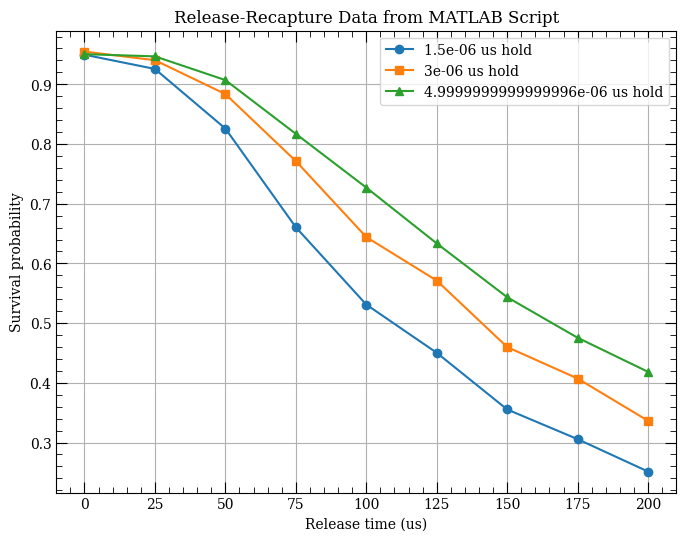

In [3]:
print('Data path: ', fname)
# plot the release recapture data from above
plt.figure(figsize=(8,6))
plt.plot(X1, surv1, 'o-', label=str(X2[0]) + ' us hold')
plt.plot(X1, surv2, 's-', label=str(X2[1]) + ' us hold')
plt.plot(X1, surv3, '^-', label=str(X2[2]) + ' us hold')
plt.xlabel('Release time (us)')
plt.ylabel('Survival probability')
plt.title('Release-Recapture Data from MATLAB Script')
plt.legend()
plt.grid()
plt.show()

### release recapture curves for various momentum squeezed states.

In [4]:
# set up simulation for Cs-Cs system with squeezing
pixel_to_um = 0.67 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
factor = 1.0
# Experiment configuration
cfg_mom_squeeze = ExperimentConfig(
    atom1 = Cesium(),
    mass_atom1 = Cesium().mass,
    n_atom1 = 54,  # Cs Rydberg n
    wavelength_nm_atom1 = 1064,  # Cs tweezer wavelength

    R_mean_um = 6 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 0,  # Cs Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive]

    Delta_scan_Hz = np.array([1e8]), # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (0.0, 0.0, 0.0),
    T_uK_atom2 = (2.0, 2.0, 2.0),

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (110e3, 110e3, 20e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (110e3, 110e3, 20e3),

    load_factor = np.sqrt(0.1), #np.sqrt(0.1),  # % of trap depth after dropping

    T2_atom1_s = 20e-6, # coherence time for Cs
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 500,  # number of Monte Carlo samples per detuning
    N_steps = 100,  # number of time steps in evolution

    load_depth_T_atom1 = 95, # uK
    load_depth_T_atom2 = 95, # uK

    plot_displacements = False,  # whether to plot displacement histogram
    simulate_atom1_recapture=False,
    simulate_atom2_recapture=True,

    squeeze_factor = (factor, factor, 1.0), # squeezing in (x, y, z) directions

    hamiltonian_on = False
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg_mom_squeeze, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -28.064532947562324 GHz·μm^6
C6 (Na 51S - Cs 54S) = 1.763e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 28.065 GHz·μm^6
time for C6 calculation: 0.2 s


In [5]:
# sweep over pulse times (Rabi frequencies)
pulse_times_us = np.linspace(1, 200, 9)  # in microseconds
colors = plt.cm.viridis(np.linspace(0, 1, len(pulse_times_us)))

# rabi_freqs_Hz = (np.pi / (2 * (pulse_times_us * 1e-6)))  # in Hz
pop_array = []
for pulse_time, color in zip(pulse_times_us, colors):
    cfg_mom_squeeze.t_pi_atom1_us = pulse_time

    # run simulation here
    start_time = time.time()
    
    # (A) with interaction + broadening
    start_time = time.time()
    d, P_int = scan_detuning(cfg_mom_squeeze, c6_rad_um6=c6, interaction_on=True)
    print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")

    pop_array.append(P_int[0])  # only one detuning point

pop_array = np.array(pop_array)
# # plot pulse time vs population
# plt.figure(figsize=(8,5))
# plt.plot(pulse_times_us, pop_array, 'o-', label='With squeezing')
# plt.xlabel("Pulse time (μs)")
# plt.ylabel("P(g_Cs) after π pulse at Δ=30 MHz")
# plt.title(f"Cs Rydberg population vs Pulse time @ R = {cfg_mom_squeeze.R_mean_um:.1f} μm")
# # set x-axis to log scale
# # plt.xscale("log")
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()

Starting detuning scan...
time for (A) with interaction: 0.1 s
Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction: 0.0 s


/Users/santi/Library/CloudStorage/GoogleDrive-santilopez@g.harvard.edu/My Drive/Research/Code/Ni lab/two atom rydberg interaction/two_atom_interaction.py:323: RuntimeWarning: divide by zero encountered in scalar divide
  nbar = 1.0 / (np.exp(hbar * omega / (kB * temp)) - 1.0)


Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction: 0.0 s
Starting detuning scan...
time for (A) with interaction: 0.0 s


### combine plots for comparison

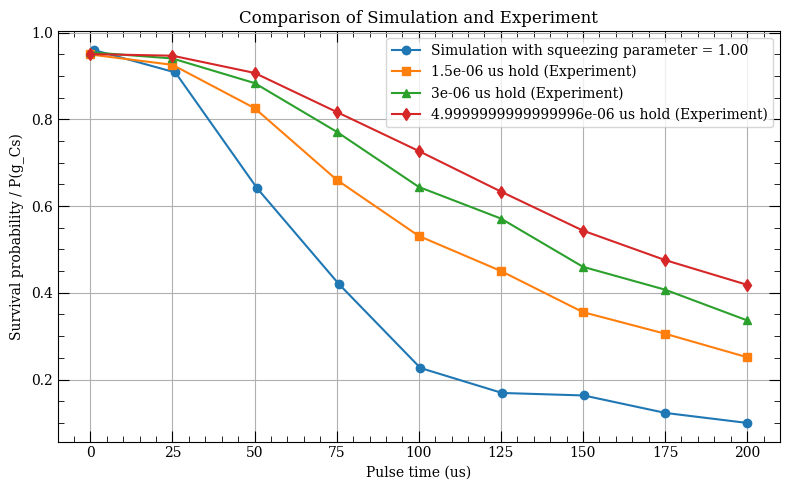

In [6]:
# combine plots for comparison (experiment and simulation)

plt.figure(figsize=(8,5))
plt.plot(pulse_times_us, pop_array*0.96, 'o-', label='Simulation with squeezing parameter = %.2f' % factor)
plt.plot(X1, surv1, 's-', label=str(X2[0]) + ' us hold (Experiment)')
plt.plot(X1, surv2, '^-', label=str(X2[1]) + ' us hold (Experiment)')
plt.plot(X1, surv3, 'd-', label=str(X2[2]) + ' us hold (Experiment)')
plt.xlabel('Pulse time (us)')
plt.ylabel('Survival probability / P(g_Cs)')
plt.title('Comparison of Simulation and Experiment')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting det

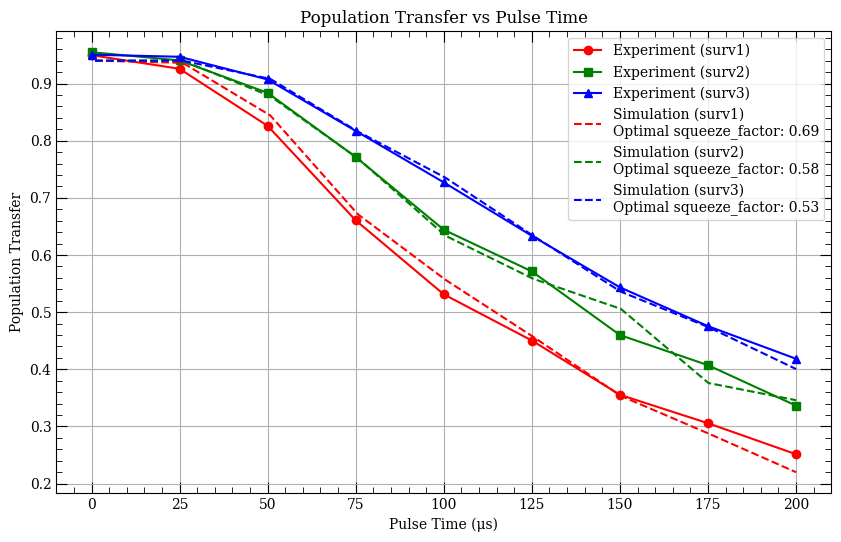

In [7]:
# run RnR simulation and optimize cfg.squeeze_factor to match experiment

# import optimization library
from scipy.optimize import minimize_scalar

# define objective function to minimize
def objective(squeeze_factor):
    cfg_mom_squeeze.squeeze_factor = (squeeze_factor, squeeze_factor, 1.0)
    pop_array = []
    for pulse_time in pulse_times_us:
        cfg_mom_squeeze.t_pi_atom1_us = pulse_time

        # run simulation here
        d, P_int = scan_detuning(cfg_mom_squeeze, c6_rad_um6=c6, interaction_on=True)

        pop_array.append(P_int[0])  # only one detuning point

    pop_array = np.array(pop_array)
    # compute error with experiment data
    error = np.sum((pop_array*0.94 - surv)**2)
    return error

# perform optimization for surv1
surv = surv1
result = minimize_scalar(objective, bounds=(0, 1), method='bounded')
optimal_squeeze_factor_1 = result.x

# perform optimization for surv2
surv = surv2
result = minimize_scalar(objective, bounds=(0, 1), method='bounded')
optimal_squeeze_factor_2 = result.x

# perform optimization for surv3
surv = surv3
result = minimize_scalar(objective, bounds=(0, 1), method='bounded')
optimal_squeeze_factor_3 = result.x

print(f'Optimal squeeze_factor for surv1: {optimal_squeeze_factor_1:.2f}')
print(f'Optimal squeeze_factor for surv2: {optimal_squeeze_factor_2:.2f}')
print(f'Optimal squeeze_factor for surv3: {optimal_squeeze_factor_3:.2f}')

# calculate pop_array for each optimal squeeze factor
cfg_mom_squeeze.squeeze_factor = (optimal_squeeze_factor_1, optimal_squeeze_factor_1, 1.0)
pop_array1 = []
for pulse_time in pulse_times_us:
    cfg_mom_squeeze.t_pi_atom1_us = pulse_time

    # run simulation here
    d, P_int = scan_detuning(cfg_mom_squeeze, c6_rad_um6=c6, interaction_on=True)

    pop_array1.append(P_int[0])  # only one detuning point
pop_array1 = np.array(pop_array1)

cfg_mom_squeeze.squeeze_factor = (optimal_squeeze_factor_2, optimal_squeeze_factor_2, 1.0)
pop_array2 = []
for pulse_time in pulse_times_us:
    cfg_mom_squeeze.t_pi_atom1_us = pulse_time

    # run simulation here
    d, P_int = scan_detuning(cfg_mom_squeeze, c6_rad_um6=c6, interaction_on=True)

    pop_array2.append(P_int[0])  # only one detuning point
pop_array2 = np.array(pop_array2)

cfg_mom_squeeze.squeeze_factor = (optimal_squeeze_factor_3, optimal_squeeze_factor_3, 1.0)
pop_array3 = []
for pulse_time in pulse_times_us:
    cfg_mom_squeeze.t_pi_atom1_us = pulse_time

    # run simulation here
    d, P_int = scan_detuning(cfg_mom_squeeze, c6_rad_um6=c6, interaction_on=True)

    pop_array3.append(P_int[0])  # only one detuning point
pop_array3 = np.array(pop_array3)

# plot the final comparison with optimal parameters
plt.figure(figsize=(10, 6))
plt.plot(X1, surv1, 'o-', c='r', label='Experiment (surv1)')
plt.plot(X1, surv2, 's-', c='g', label='Experiment (surv2)')
plt.plot(X1, surv3, '^-', c='b', label='Experiment (surv3)')
plt.plot(pulse_times_us, 0.94*pop_array1, '--', c='r', label=f'Simulation (surv1)\nOptimal squeeze_factor: {optimal_squeeze_factor_1:.2f}')
plt.plot(pulse_times_us, 0.94*pop_array2, '--', c='g', label=f'Simulation (surv2)\nOptimal squeeze_factor: {optimal_squeeze_factor_2:.2f}')
plt.plot(pulse_times_us, 0.94*pop_array3, '--', c='b', label=f'Simulation (surv3)\nOptimal squeeze_factor: {optimal_squeeze_factor_3:.2f}')
plt.xlabel('Pulse Time (μs)')
plt.ylabel('Population Transfer')
plt.title('Population Transfer vs Pulse Time')
plt.legend()
plt.grid()
plt.show()


## Now calculating interaction peak with optimal squeezing parameter.

In [51]:
temp = 0.0 * 1e-6
omega = TWOPI * 110e3 # angular frequency in rad/s

# mean occupation number
nbar = 1.0 / (np.exp(hbar * omega / (kB * temp)) - 1.0)

print(nbar)

ZeroDivisionError: float division by zero

In [ ]:
factor = 0.5
pixel_to_um = 0.67 # imaging system calibration from Cs-Cs (Na-Cs gives ~ 0.87)
# Experiment configuration
cfg_mom_squeeze = ExperimentConfig(
    atom1 = Cesium(),
    mass_atom1 = Cesium().mass,
    n_atom1 = 54,  # Cs Rydberg n
    wavelength_nm_atom1 = 1064,  # Cs tweezer wavelength

    R_mean_um = 7.5 * pixel_to_um,  # mean interatomic distance in microns
    R_axis_um = (1.0, 0.0, 0.0),  # along x-axis
    OMEGA_atom1_Hz = 0.05*10**6,  # Cs Rabi frequency (Hz)
    OMEGA_atom2_Hz = 0,  # Cs Rabi frequency (Hz) [no Cs drive]

    Delta_scan_Hz = np.linspace(-1, 3, 30) * 1e6, # detuning scan range (Hz)

    # Order: (x, y, z). (radial, radial, axial)
    # These are the *ground-state* trap temps of each tweezer. (uK)
    T_uK_atom1 = (2.0, 2.0, 2.0),
    T_uK_atom2 = (2.0, 2.0, 2.0),

    # These are the *ground-state* trap frequencies of each tweezer. (loading depth)
    omega_trap_atom1_Hz = (110e3, 110e3, 20e3), # using values from ryan 29Oct
    omega_trap_atom2_Hz = (110e3, 110e3, 20e3),

    load_factor = np.sqrt(200/650), #np.sqrt(0.1),  # % of trap depth after dropping

    T2_atom1_s = 20e-6, # coherence time for Cs
    T2_atom2_s = 20e-6, # coherence time for Cs
    T1_use_ARC = True, # whether to use ARC lifetimes for T1

    broadening = True, # turn on or off broadening
    N_mc = 500,  # number of Monte Carlo samples per detuning
    N_steps = 200,  # number of time steps in evolution

    load_depth_T_atom1 = 95, # uK
    load_depth_T_atom2 = 95, # uK

    plot_displacements = False,  # whether to plot displacement histogram
    simulate_atom1_recapture=True,
    simulate_atom2_recapture=True,

    squeeze_factor = (factor, factor, 1.0), # squeezing in (x, y, z) directions

    hamiltonian_on = True
)

start_time = time.time()
# Compute C6 once (ARC)
c6 = compute_c6_atom1_atom2_rad_per_s_um6(cfg_mom_squeeze, progress=True)
print(f"C6 (Na 51S - Cs 54S) = {c6:.3e} rad/s·μm^6")
print("C6 (Na 51S - Cs 54S) = %.3f GHz·μm^6" % (c6 / (2*np.pi*1e9)))
print(f"time for C6 calculation: {time.time() - start_time:.1f} s")

Computed C6: -28.064532947562324 GHz·μm^6
C6 (Na 51S - Cs 54S) = 1.763e+11 rad/s·μm^6
C6 (Na 51S - Cs 54S) = 28.065 GHz·μm^6
time for C6 calculation: 0.2 s


Starting detuning scan...
  Point 2/30 - Elapsed: 1.5s, Est. remaining: 21.0s
  Point 4/30 - Elapsed: 4.3s, Est. remaining: 27.9s
  Point 6/30 - Elapsed: 7.0s, Est. remaining: 28.1s
  Point 8/30 - Elapsed: 9.4s, Est. remaining: 25.9s
  Point 10/30 - Elapsed: 11.5s, Est. remaining: 23.1s
  Point 12/30 - Elapsed: 13.8s, Est. remaining: 20.7s
  Point 14/30 - Elapsed: 16.4s, Est. remaining: 18.7s
  Point 16/30 - Elapsed: 19.1s, Est. remaining: 16.7s
  Point 18/30 - Elapsed: 22.1s, Est. remaining: 14.7s
  Point 20/30 - Elapsed: 25.2s, Est. remaining: 12.6s
  Point 22/30 - Elapsed: 28.6s, Est. remaining: 10.4s
  Point 24/30 - Elapsed: 32.3s, Est. remaining: 8.1s
  Point 26/30 - Elapsed: 36.3s, Est. remaining: 5.6s
  Point 28/30 - Elapsed: 40.5s, Est. remaining: 2.9s
  Point 30/30 - Elapsed: 44.9s, Est. remaining: 0.0s
time for (B) without interaction: 47.1 s
Starting detuning scan...
  Point 2/30 - Elapsed: 2.3s, Est. remaining: 31.6s
  Point 4/30 - Elapsed: 6.4s, Est. remaining: 41.7s
  Poi

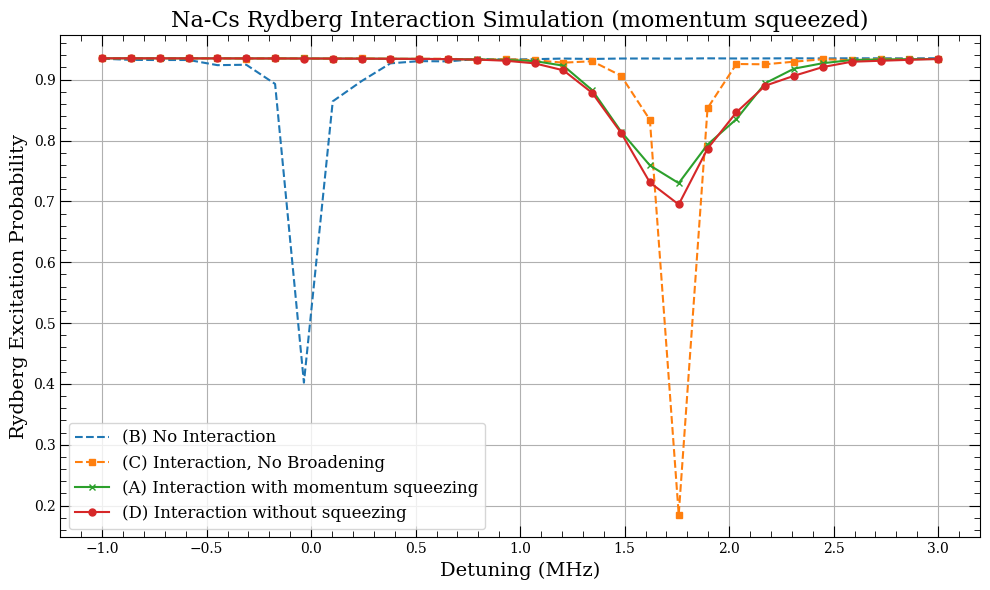

In [48]:
# ---------------------------------
# Main simulation
# ---------------------------------
# (B) without interaction
start_time = time.time()
d, P_no = scan_detuning(cfg_mom_squeeze, c6_rad_um6=c6, interaction_on=False)
print(f"time for (B) without interaction: {time.time() - start_time:.1f} s")

# (C) without broadening
start_time = time.time()
d, P_no_broad = scan_detuning(ExperimentConfig(**{**cfg_mom_squeeze.__dict__, "broadening": False}), c6_rad_um6=c6, interaction_on=True)
print(f"time for (C) without broadening: {time.time() - start_time:.1f} s")

# (A) with interaction
start_time = time.time()
d, P_int_mom_squeeze = scan_detuning(cfg_mom_squeeze, c6_rad_um6=c6, interaction_on=True)
print(f"time for (A) with interaction: {time.time() - start_time:.1f} s")

# (D) with interaction but no squeezing
start_time = time.time()
exp_cfg_no_squeeze = ExperimentConfig(**{**cfg_mom_squeeze.__dict__, "squeeze_factor": (1.0, 1.0, 1.0)})
d, P_int_no_squeeze = scan_detuning(exp_cfg_no_squeeze, c6_rad_um6=c6, interaction_on=True)
print(f"time for (D) with interaction but no squeezing: {time.time() - start_time:.1f} s")

print("Simulation done.")

# Plotting
plt.figure(figsize=(10,6))
plt.plot(d / 1e6, P_no, '--', label='(B) No Interaction', markersize=5)
plt.plot(d / 1e6, P_no_broad, 's--', label='(C) Interaction, No Broadening', markersize=5)
plt.plot(d / 1e6, P_int_mom_squeeze, 'x-', label='(A) Interaction with momentum squeezing', markersize=5)
plt.plot(d / 1e6, P_int_no_squeeze, 'o-', label='(D) Interaction without squeezing', markersize=5)
plt.xlabel('Detuning (MHz)', fontsize=14)
plt.ylabel('Rydberg Excitation Probability', fontsize=14)
plt.title('Na-Cs Rydberg Interaction Simulation (momentum squeezed)', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
print(pop_array3 - pop_array2)
print(pop_array2 - pop_array1)

[0.    0.    0.    0.    0.054 0.042 0.072 0.062 0.068]
[0.    0.    0.    0.076 0.314 0.338 0.222 0.13  0.086]


Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...


/Users/santi/Library/CloudStorage/GoogleDrive-santilopez@g.harvard.edu/My Drive/Research/Code/Ni lab/two atom rydberg interaction/two_atom_interaction.py:323: RuntimeWarning: divide by zero encountered in scalar divide
  nbar = 1.0 / (np.exp(hbar * omega / (kB * temp)) - 1.0)


Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting detuning scan...
Starting det

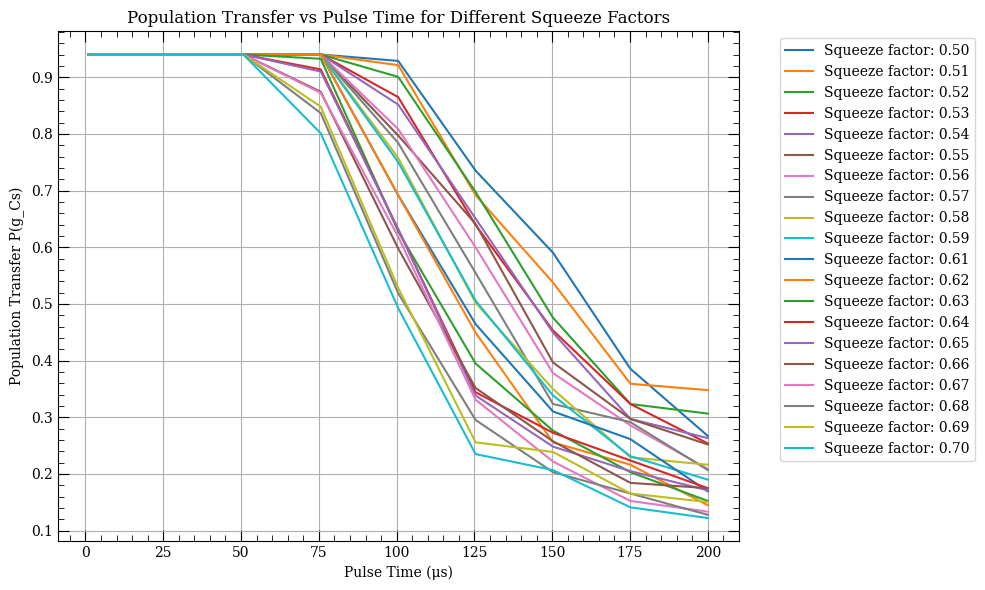

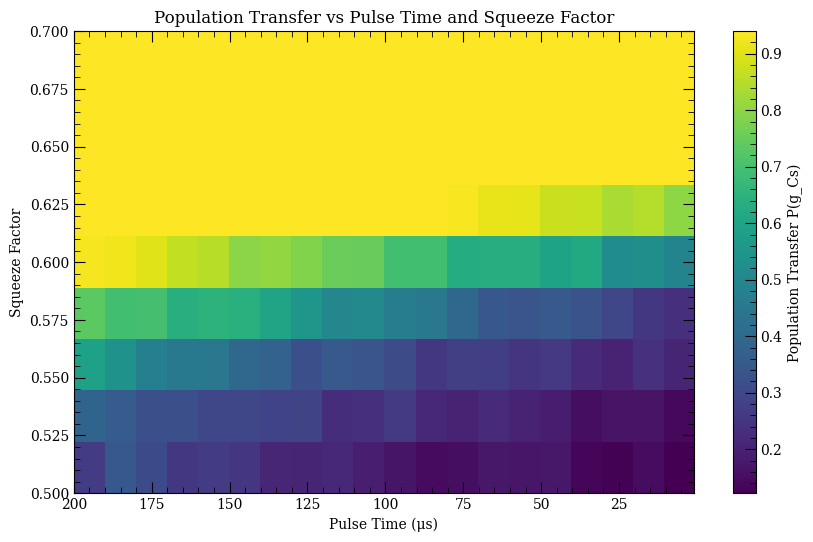

In [ ]:
# scan over many squeeze factors and plot results
squeeze_factors = np.linspace(0.5, 0.7, 20)
pop_arrays = []
for squeeze_factor in squeeze_factors:
    cfg_mom_squeeze.squeeze_factor = (squeeze_factor, squeeze_factor, 1.0)
    pop_array = []
    for pulse_time in pulse_times_us:
        cfg_mom_squeeze.t_pi_atom1_us = pulse_time

        # run simulation here
        d, P_int = scan_detuning(cfg_mom_squeeze, c6_rad_um6=c6, interaction_on=True)

        pop_array.append(P_int[0])  # only one detuning point

    pop_array = np.array(pop_array)
    pop_arrays.append(pop_array)

pop_arrays = np.array(pop_arrays)

# plot line plots for different squeeze factors
plt.figure(figsize=(10, 6))
for i, squeeze_factor in enumerate(squeeze_factors):
    plt.plot(pulse_times_us, pop_arrays[i]*0.94, label=f'Squeeze factor: {squeeze_factor:.2f}')
plt.xlabel('Pulse Time (μs)')
plt.ylabel('Population Transfer P(g_Cs)')
plt.title('Population Transfer vs Pulse Time for Different Squeeze Factors')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()
# plot heatmap of population vs pulse time and squeeze factor
plt.figure(figsize=(10, 6))
plt.imshow(pop_arrays.T*0.94, extent=[pulse_times_us[-1], pulse_times_us[0], squeeze_factors[0], squeeze_factors[-1]], aspect='auto', cmap='viridis')
plt.colorbar(label='Population Transfer P(g_Cs)')
plt.xlabel('Pulse Time (μs)')
plt.ylabel('Squeeze Factor')
plt.title('Population Transfer vs Pulse Time and Squeeze Factor')
plt.show()